# Using Jupyter Lab for data exploration

In [159]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import psycopg2
import textatistic
import seaborn as sbn
from altair import Chart, X, Y, Color, Scale
import altair as alt
from vega_datasets import data
import requests
from bs4 import BeautifulSoup
matplotlib.style.use('ggplot')
# for plotly py.offline.init_notebook_mode()

## Reading List

* [Getting Started with Altair](https://altair-viz.github.io/getting_started/starting.html) Read the overview and then move to the [User Guide](https://altair-viz.github.io/user_guide/data.html) Read this through data transformations.  
* [A Comprehensive Guide to the Grammar of Graphics](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)
* [Introduction to Pandas Part I](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)    

* [Beautiful Soup docs](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

Let's start by loading some data about countries.  This data has been compiled by combining information from files at: http://gsociology.icaap.org/dataupload.html we are going to use it to warm up our pandas skills.  In this first part of the module we will continue with some data that should be familair to you but we will use it in Pandas instead of a spreadsheet.  In the second part we will focus on several different kinds of textual analysis using data from the United Nations.

The goals for Part I of the module are:

* Loading data into pandas
* Using Altair to make some quick visualization of the data
* Querying (filtering) our data
* Sorting data
* Adding new columns of data


#### Loading data into a dataframe from a CSV file

In [76]:
wd = pd.read_csv('world_countries.csv')

In [5]:
wd.head()

,Country,Ct,Code,CodeNum,Region,Population,Area,Pop. Density,Coastline,Net migration,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,Afghanistan,AFG,4,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,Albania,ALB,8,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,Algeria,DZA,12,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,American Samoa,ASM,16,OCEANIA,57794,199,290.4,58.29,-20.71,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,Andorra,AND,20,WESTERN EUROPE,71201,468,152.1,0.00,6.60,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Understanding the Data

* Country
* Area Square Miles
* Population Density per square mile
* Coastline coast/area ratio
* Net migration
* Infant mortaility per 1000 births
* GDP $ per capita
* Literacy %
* Phones per 1000
* Arable land %
* Crops %
* other %
* Climate
* Birthrate
* Deathrate
* Agriculture % GDP
* Inustry % GDP
* Service % GDP


The Climate numbers are as follows:
1. Dry tropical or tundra and ice, classification B and E.
2. Wet tropical, classification A.
3. Temperate humid subtropical and temperate continental, classification Cfa, Cwa, and D.
4. Dry hot summers and wet winters,



In [ ]:
wd.to_csv('countries_of_the_world.csv', columns='Country',
 'Code',
 'Region',
 'Population',
 'Area',
 'Pop. Density',
 'Coastline',
 'Net migration',
 'Infant mortality',
 'GDP',
 'Literacy',
 'Phones',
 'Arable',
 'Crops',
 'Other',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service'])

In [6]:
wd.describe()

,CodeNum,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,225.000000,2.250000e+02,2.250000e+02,225.000000,225.000000,222.000000,222.000000,224.000000,209.000000,221.000000,223.000000,223.000000,223.000000,203.000000,222.000000,221.000000,210.000000,209.000000,210.000000
mean,436.213333,2.897847e+07,6.035169e+05,362.911111,21.304089,0.017838,35.635180,9770.089286,82.838278,236.435294,13.715247,4.425695,81.858700,2.130542,21.993604,9.290045,0.151710,0.282722,0.564395
std,254.713527,1.183891e+08,1.797370e+06,1650.160243,72.591840,4.906187,35.523302,10057.808157,19.722173,228.942889,13.057554,8.268356,16.029195,0.697558,11.147278,4.986086,0.147199,0.138935,0.166357
min,4.000000,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,214.000000,4.361310e+05,5.128000e+03,29.000000,0.100000,-0.962500,8.070000,1900.000000,70.600000,37.200000,3.160000,0.190000,72.825000,2.000000,12.597500,5.980000,0.038000,0.190000,0.427750
50%,434.000000,5.042920e+06,8.836100e+04,77.400000,0.730000,0.000000,21.000000,5700.000000,92.500000,176.200000,10.380000,1.010000,86.070000,2.000000,18.750000,8.100000,0.099500,0.270000,0.566500
75%,654.000000,1.765484e+07,4.465500e+05,183.500000,10.320000,0.965000,56.095000,15775.000000,98.000000,394.400000,20.000000,4.425000,95.470000,3.000000,29.645000,10.620000,0.223000,0.342000,0.677500
max,894.000000,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


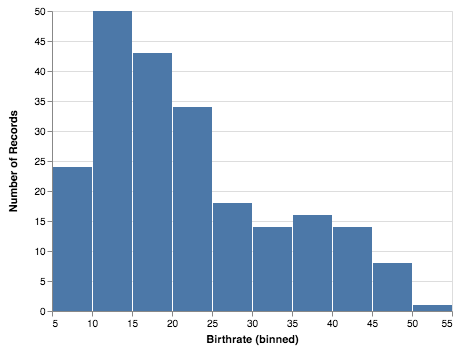

In [7]:
c = Chart(wd) # make a chart
m = c.mark_bar() # set the mark -- returns a new Chart
e = m.encode(X('Birthrate',bin=True),y='count()') # set the encoding 
e.display()

We can shortcut a lot of what we did above into a single line because once we have created a mark there is really nothing more to do with it besides add the encoding.  Because the methods are all cleverly designed to return the proper object we can string all of the calls above into a single line.  We also do not need to explicitly call display because Altair returns an object that the Jupyter environment knows how to display.

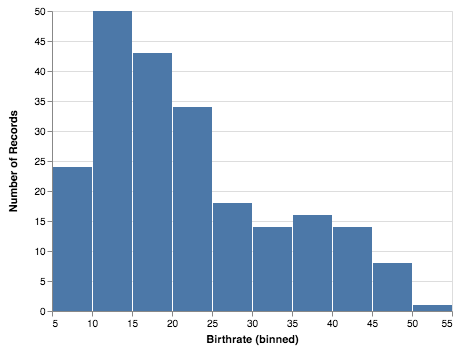

In [8]:
Chart(wd).mark_bar().encode(x=X('Birthrate', bin=True), y='count()')

### Practice

* Create some histograms to investigate the distributions of some other variables of the data set


Now lets make a simple scatter plot

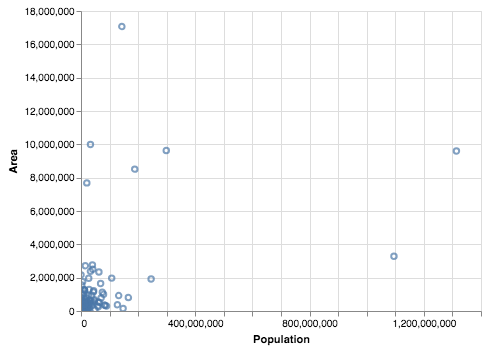

In [9]:
Chart(wd).mark_point().encode(x='Population', y='Area', tooltip='Country').interactive()

Thats not a very satisfying graph.  But it does make us want to focus more on the lower left corner.  Let's redo the graph but focus on the countrieswith a population under 150 million and an area under 4 million.  Lets start with the first part

To do this we will create a new DataFrame where we focus on the countries with populations less than 150 million and areas less than 4 million.  Pandas makes this really easy with its querying power.

The statement below produces a Series of boolean values.  These boolean values are used to index the data frame and only the rows corresponding to True values are returned in the result.

In [10]:
(wd.Population < 150000000).head(20)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: Population, dtype: bool

To be a bit more dramatic lets look at the countries of less than 150,000

In [11]:
wd[wd.Population < 150000]

,Country,Ct,Code,CodeNum,Region,Population,Area,Pop. Density,Coastline,Net migration,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,American Samoa,ASM,16,OCEANIA,57794,199,290.4,58.29,-20.71,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,Andorra,AND,20,WESTERN EUROPE,71201,468,152.1,0.00,6.60,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
6,Anguilla,Anguilla,AIA,660,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,...,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,Antigua & Barbuda,ATA,10,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,...,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
10,Aruba,Aruba,ABW,533,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,...,516.1,10.53,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663
22,Bermuda,Bermuda,BMU,60,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,...,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
28,British Virgin Is.,British Virgin Is.,IOT,86,LATIN AMER. & CARIB,23098,153,151.0,52.29,10.01,...,506.5,20.00,6.67,73.33,2.0,14.89,4.42,0.018,0.062,0.920
38,Cayman Islands,Cayman Islands,CYM,136,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,...,836.3,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954
47,Cook Islands,Cook Islands,COK,184,OCEANIA,21388,240,89.1,50.00,NaN,...,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
56,Dominica,Dominica,DMA,212,LATIN AMER. & CARIB,68910,754,91.4,19.63,-13.87,...,304.8,6.67,20.00,73.33,2.0,15.27,6.73,0.177,0.328,0.495


Now lets graph these countries.  The easiest way to do this is to plug the query right into the call to create a Chart rather than assigning it to a variable first.

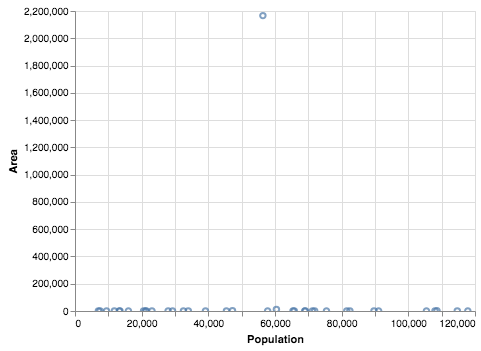

In [12]:
Chart(wd[wd.Population < 150000]).mark_point().encode(x='Population', y='Area', tooltip='Country').interactive()

How interesting!  One country pushes all the others down.  We added a tooltip parameter so that if you hover over that point you will see it is Greenland!  Lots of land area but not too many people.  There are large universities that have more people than the country of Greenland.  Lets improve out query to focus on area less than 200,000


We can do more complicated boolean expressions by using the `|` (logical or)  and `&` (logical and) operators.  Normally in Python these two operators are used for bitwise or and bitwise and. So we can create a more complicated boolean expression to limit our DataFrame in both directions.



In [13]:
wd[(wd.Population < 150000) & (wd.Area < 200000)]

,Country,Ct,Code,CodeNum,Region,Population,Area,Pop. Density,Coastline,Net migration,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,American Samoa,ASM,16,OCEANIA,57794,199,290.4,58.29,-20.71,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,Andorra,AND,20,WESTERN EUROPE,71201,468,152.1,0.00,6.60,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
6,Anguilla,Anguilla,AIA,660,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,...,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,Antigua & Barbuda,ATA,10,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,...,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
10,Aruba,Aruba,ABW,533,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,...,516.1,10.53,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663
22,Bermuda,Bermuda,BMU,60,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,...,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
28,British Virgin Is.,British Virgin Is.,IOT,86,LATIN AMER. & CARIB,23098,153,151.0,52.29,10.01,...,506.5,20.00,6.67,73.33,2.0,14.89,4.42,0.018,0.062,0.920
38,Cayman Islands,Cayman Islands,CYM,136,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,...,836.3,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954
47,Cook Islands,Cook Islands,COK,184,OCEANIA,21388,240,89.1,50.00,NaN,...,289.9,17.39,13.04,69.57,2.0,21.00,NaN,0.151,0.096,0.753
56,Dominica,Dominica,DMA,212,LATIN AMER. & CARIB,68910,754,91.4,19.63,-13.87,...,304.8,6.67,20.00,73.33,2.0,15.27,6.73,0.177,0.328,0.495


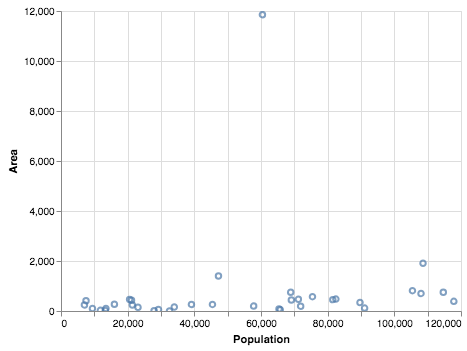

In [14]:
Chart(wd[(wd.Population < 150000) & (wd.Area < 200000)]).mark_point().encode(x='Population', y='Area', tooltip='Country').interactive()

OK, so maybe you have a favorite country you have visited or lived in at some point.  I lived in Malta for six months, so I'm always curious about Malta.  Lets see what data we have in the data frame for Malta using an equality:

In [15]:
wd[wd.Country == 'Malta']

,Country,Ct,Code,CodeNum,Region,Population,Area,Pop. Density,Coastline,Net migration,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service


Hmmm.. that seems odd that Malta would not be in the dataset.  Lets try some other countries.  Nothing seems to work.  One common problem is that names and other strings can end up with spaces at the beginning or the end.  If you do a quick try you will see that 'Malta ' works.  But that is horrible.  We don't want to have to remember to put spaces at the end of every string all the time.  We should do a little data cleanup and strip those spaces.

In [16]:
wd[wd.Country == 'Malta ']

,Country,Ct,Code,CodeNum,Region,Population,Area,Pop. Density,Coastline,Net migration,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
128,Malta,Malta,MLT,470,WESTERN EUROPE,400214,316,1266.5,62.28,2.07,...,505.0,28.13,3.13,68.74,NaN,10.22,8.1,0.03,0.23,0.74


You may recall that Python has a string method called `strip` that does exactly what we want.  How can we get that to apply to all of the strings in the Series?  Pandas allows us to do this using the str attribute of the series in combination with most of the standard string methods you know about.

In [17]:
wd.Country.str.strip()

0                                            Afghanistan
1                                                Albania
2                                                Algeria
3                                         American Samoa
4                                                Andorra
5                                                 Angola
6                                               Anguilla
7                                      Antigua & Barbuda
8                                              Argentina
9                                                Armenia
10                                                 Aruba
11                                             Australia
12                                               Austria
13                                            Azerbaijan
14                                          Bahamas, The
15                                               Bahrain
16                                            Bangladesh
17                             

Now we can replace our original Country column with the stripped column.

In [18]:
wd['Country'] = wd.Country.str.strip()

In [19]:
wd[wd.Country == 'Malta']

,Country,Ct,Code,CodeNum,Region,Population,Area,Pop. Density,Coastline,Net migration,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
128,Malta,Malta,MLT,470,WESTERN EUROPE,400214,316,1266.5,62.28,2.07,...,505.0,28.13,3.13,68.74,NaN,10.22,8.1,0.03,0.23,0.74


## Power Tools -- Scatter Matrix

It would be pretty tedius to look at all the different pairs of things we might want to look at for correlation one at a time, but we can Use a scatter matrix to make life easier.

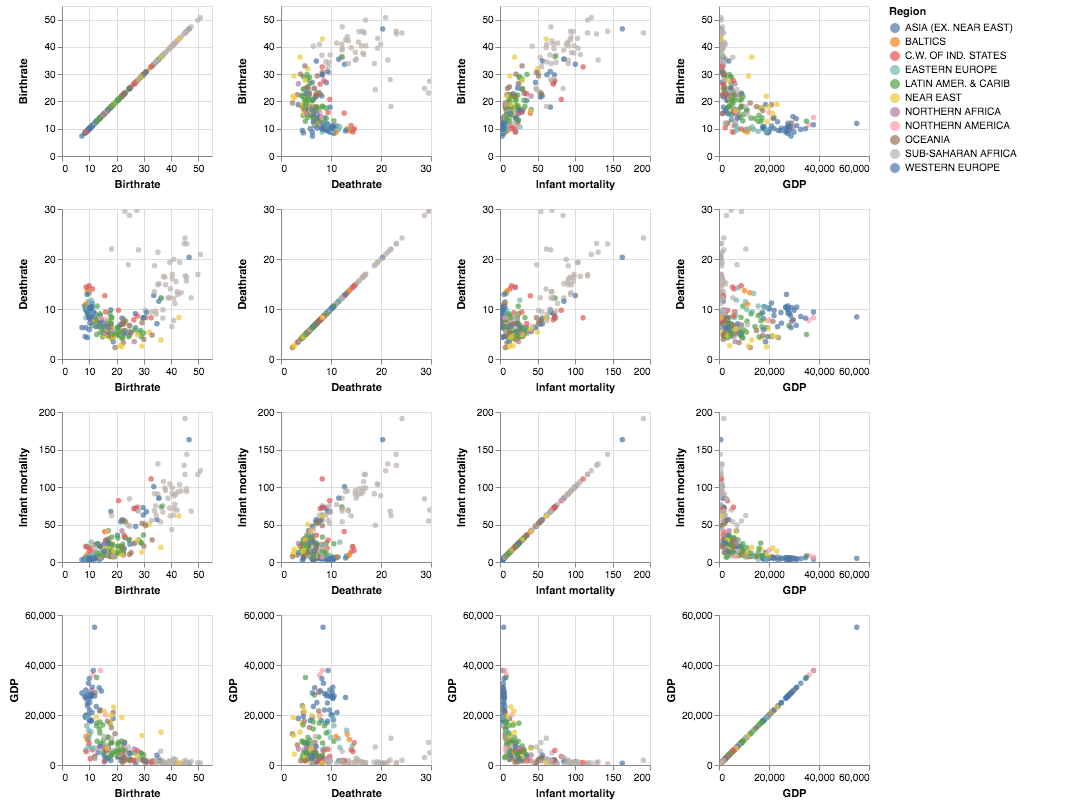

In [155]:
alt.Chart(wd).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Region:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Birthrate', 'Deathrate', 'Infant mortality', 'GDP'],
    column=['Birthrate', 'Deathrate', 'Infant mortality', 'GDP']
).interactive()

In [153]:
list(reversed(['a','b']))


['b', 'a']

# Developing Fluency

Pandas will only become a part of your daily workflow when you develop fluency with the basics.  You need to be able to do easy queries without having to think hard about the syntax.  The only way that happens is through repetition.  Lots of repetition and ideally that repetitive practice is spread out over time.

That doesn't mean you can't go on and do lots of much harder things, it just means it will take longer at first as you have to go back and review documentation in order to become efficient.

### Practice Questions

1. What are the top 10 countries with the largest GDP?
1. What are the top 20 countries by Population?
1. What are the 10 countries with the largest net migration?
1. What is distribution of Argiculture, Industry, and service for the countries in Western Europe?
1. What are the names, population and Area of the 5 largest (by area) landlocked countries?  
1. What are the names and population of the five most populous landlocked countries?
1. What what is the name and GDP of the 10 countries with the most cell phones/1000 people?
1. What are the 10 countries with the largest GDP that have a "Wet Tropical" climate?



In [20]:
from math import log
wd['logpop'] = wd.Population.map(lambda x: log(x))

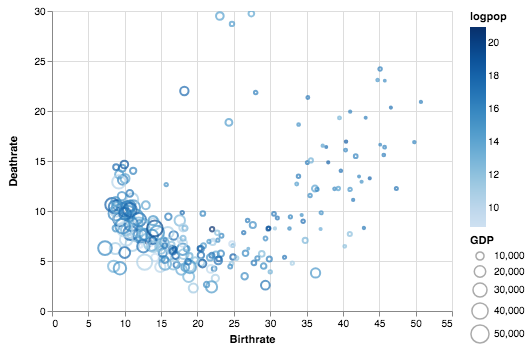

In [21]:
Chart(wd).mark_point().encode(x='Birthrate', y='Deathrate', size='GDP', color='logpop', tooltip='Country').interactive()

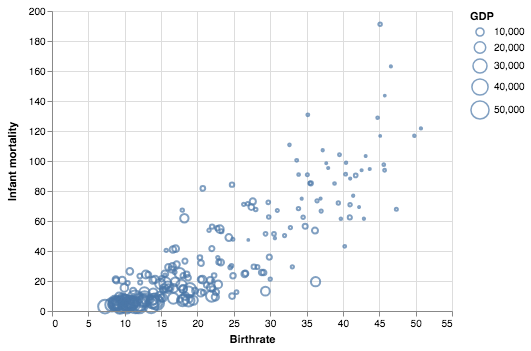

In [22]:
Chart(wd).mark_point().encode(y='Infant mortality',x='Birthrate', size='GDP')

In [23]:
wd[['Infant mortality', 'Birthrate']].corr()

,Infant mortality,Birthrate
Infant mortality,1.000000,0.856764
Birthrate,0.856764,1.000000


In [24]:
wd.groupby('Region')['Birthrate', 'Infant mortality'].mean()

,Birthrate,Infant mortality
Region,,
ASIA (EX. NEAR EAST),21.157857,41.780000
BALTICS,9.343333,8.103333
C.W. OF IND. STATES,17.855833,44.410000
EASTERN EUROPE,10.370909,12.686667
LATIN AMER. & CARIB,19.081111,20.092667
NEAR EAST,23.527857,23.677857
NORTHERN AFRICA,20.814000,30.916000
NORTHERN AMERICA,13.154000,8.628000
OCEANIA,22.108000,20.203684


# Graphing Infant Mortality on a map

Let us take on the seemingly simple task of plotting some of the country data on a map.  Like we did in Google Sheets earlier.  We'll see that this is one area where things are not quite as simple as they are in Sheets.  But we can make it work with a bit of effort.

Altair provides us with the facility to make a blank map.  But filling in the data requires a bit more work on our part.  

This is a good example of learning by example and extrapolating what you need to do based on understanding the example.

The counties data that is passed to the chart is the data needed to create and outline the map

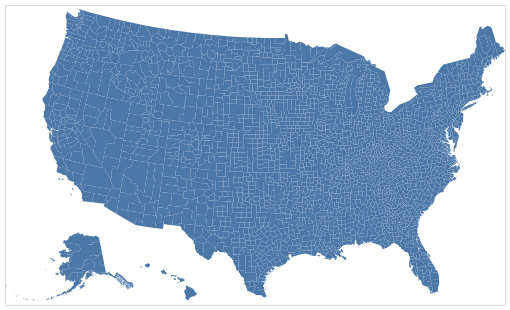

In [85]:
import altair as alt
from vega_datasets import data
counties = alt.topo_feature(data.us_10m.url, 'counties')
unemp_data = data.unemployment.url


alt.Chart(counties).mark_geoshape().project(
    type='albersUsa').properties(
    width=500,
    height=300
)

What about our encoding channels??!!  The primary data needed to draw the map using a `mark_geoshape` was passed to the Chart, but that is really secondary data for us, what we care about is graphing the unemployment data by county.  That is in a different data frame with a column called rate.

With a geoshape we can encode the county data using color.  But there is no unemployment data in counties so we have to use a `transform_lookup` to **map** from the way counties are identified in the geo data to our dataframe that contains unemployment data.



In [104]:
unemp_data = pd.read_csv('http://vega.github.io/vega-datasets/data/unemployment.tsv',sep='\t')
unemp_data.head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


Using the transform_lookup method we can arrange for the id in the geographic data to be matched against the id in our unemp_data data frame.  This allows us to make use of two data frames in one graph.  The example below is a bit misleading in that id is used both as th lookup as well as the key in the call to LookupData.  The lookup value refers to the column name in the dataframe passed to Chart where as the second parameter to the LookupData call is the name of the column in the unemp_data dataframe.  It is just a coincidence that they have the same name in this example.

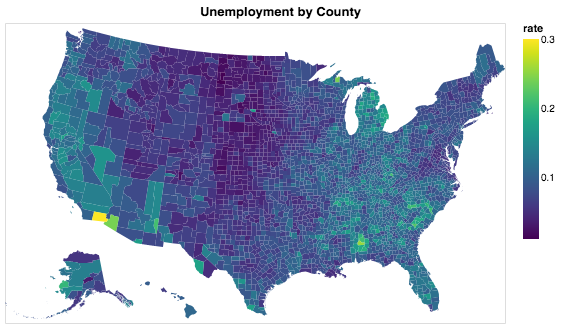

In [105]:

alt.Chart(counties).mark_geoshape(
).encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300,
    title='Unemployment by County'
)

## Screen Scraping Country IDs
Can you make use of the provided example and the altair documentation to produce a graph of the world where the countries are colored by one of the features in the data?  

You have some work to do:

In this part of the project we will:

* Review the structure of a web page
* Review the CSS Query selector language
* Learn to use the requests module to get data from the web into our program
* Learn about the Beautiful Soup package for scraping data from a webpage
* Learn how to add columns to a data frame using the `map` function.  And possibly learn to use a lambda function if you've never used one before.

Lets make a todo list:

1.  We need to add a column to our wd dataframe that contains the numerical country id.  Where can we get this data?  There may be some CSV files with this information already in them, but this is a good chance to learn about a common technique used by data scientists everywhere.  **screen scraping** 

In [160]:
page = requests.get('https://www.nationsonline.org/oneworld/country_code_list.htm')
soup = BeautifulSoup(page.text, 'html.parser')

The soup object is now a representation of the web page that we can work with and query.  In fact if you have done any web programming you will be able to use the familiar CSS query selector syntax to query the object and get back matching elements.
If you need a refresher on that or if you have never done anything with that then take a look at [This W3Schools reference](https://www.w3schools.com/cssref/css_selectors.asp)

We can use `print(soup.prettify())` to print out all of the source for the web page we just downloaded.  If we do some searching through that text we will see that each row of the table containing the data we want looks like this:

     <tr class="border1" style=" margin-top:3px; margin-bottom:3px">
        <td style="width:20px">
         <div class="flag" id="AFG">
         </div>
        </td>
        <td class="abs">
         <a href="afghanistan.htm">
          Afghanistan
         </a>
        </td>
        <td style="text-align:center">
         AF
        </td>
        <td style="text-align:center">
         AFG
        </td>
        <td style="text-align:center">
         004
        </td>
       </tr>
       <tr class="border1">
        <td style="width:20px">
         <img alt="ALA" height="12" src="../flags12/Aaland12_flag.gif" width="20"/>
        </td>
        <td class="abs">
         <em>
          Aland Islands
         </em>
        </td>
        <td style="text-align:center">
         AX
        </td>
        <td style="text-align:center">
         ALA
        </td>
        <td style="text-align:center">
         248
        </td>
       </tr>
       
       
Now you may think this is a horrible mess to work with.  But it is actually very structured:

1. We have a table
2. The table has rows (tr tags) and each row has five columns.
3. The three letter country code is always in the 4th column
4. The numeric country code is always in the 5th column.

When you break it down like that it doesn't seem so hard.  Now the trick is getting past all of the extra stuff, and that is where Beautiful Soup is our friend!

If you have not used Beautiful Soup before now would be an excellent time to work through this [video tutorial](https://www.youtube.com/watch?v=ng2o98k983k) or if you prefer text this [blog post](https://www.dataquest.io/blog/web-scraping-tutorial-python/) is good.


What we want to do is search for a `tr` tag with the class "border1"  Using our CSS selector language we can find all of the instances of that on the web page using "tr.border1"  If there are multiple matches select will return them as a list.  So lets look at the first 3 elements we get back from searching our page.


In [165]:
soup.select("tr.border1")[:3]

[<tr class="border1" style=" margin-top:3px; margin-bottom:3px">
 <td style="width:20px"> </td>
 <td> </td>
 <td style="text-align:center"> </td>
 <td style="text-align:center"> </td>
 <td style="text-align:center"> </td>
 </tr>, <tr class="border1" style=" margin-top:3px; margin-bottom:3px">
 <td style="width:20px"><div class="flag" id="AFG"></div></td>
 <td class="abs"><a href="afghanistan.htm">Afghanistan</a></td>
 <td style="text-align:center"> AF</td>
 <td style="text-align:center">AFG</td>
 <td style="text-align:center">004</td>
 </tr>, <tr class="border1">
 <td style="width:20px"><img alt="ALA" height="12" src="../flags12/Aaland12_flag.gif" width="20"/></td>
 <td class="abs"><em>Aland Islands</em></td>
 <td style="text-align:center">AX</td>
 <td style="text-align:center">ALA</td>
 <td style="text-align:center">248</td>
 </tr>]

Select returns a list of items that we can iterate over or use for further queryies.



Let's look at an easy way to use another select to get the `td` elements from each row and print out the the text contained in the 4th and 5th `td`

In [173]:
for row in soup.select("tr.border1")[:10]:
    col_list = row.select('td')
    print(col_list[3].text, col_list[4].text)

   
AFG 004
ALA 248
ALB 008
DZA 012
ASM 016
AND 020
AGO 024
AIA 660
ATA 010


OK, now modify the code above so instead of printing the values you create a dictionary.  The key should be the three digit country code and the value should be the numeric code converted to an integer.  You will need to check your work to make sure that the dictionary is clean.  You don't want keys that have whitespace in them and you may need to account for the occasional blank row in the table.


In [183]:
## DELETE ME
cc_map = {}
for row in soup.select("tr.border1"):
    col_list = row.select('td')
    if col_list[4].text.isnumeric():
        cc_map[col_list[3].text.strip()] = int(col_list[4].text)

Now that you have the dictionary we can take the next step of adding the numeric information as a new column to our wd dataframe.  The most common way of doing this is through the use of the `map` function.  Map is a very common in functional programming as well as for Pandas programmers.  The pattern is as follows `dataframe.column.map(afunction)` . The function you pass to map should take a single parameter and return the value you want to go into the new column.  The parameter will be the value from `column` for a particular row.  So to add a column to our wd dataframe that contains the code number for acountry we can simply do:

In [186]:
wd['CodeNum'] = wd.Code.map(cc_map.get)
wd.head()

,Country,Ctry,Code,CodeNum,Region,Population,Area,Pop. Density,Coastline,Net migration,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,Afghanistan,AFG,4.0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,Albania,ALB,8.0,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,Algeria,DZA,12.0,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,American Samoa,ASM,16.0,OCEANIA,57794,199,290.4,58.29,-20.71,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,Andorra,AND,20.0,WESTERN EUROPE,71201,468,152.1,0.00,6.60,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


So -- why did `cc_map.get` work?  Because it is a function that takes a single parameter, namely the three letter country code and returns the corresponding value in the dictionary.  This is really convenient, but is definitely not the only way to do it.  The most common ways are

* use a `lambda` function
* Write a function using def

We can modify the statement above to use a lambda as follows:  `wd.Code.map(lambda x: cc_map[x])` That is a bit clearer about what's going on if you understand lambdas.  If you have never used lambda functions before you should read [This post](https://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/)

So, now you have the information you need to use the example of the counties above and apply that to the world below.

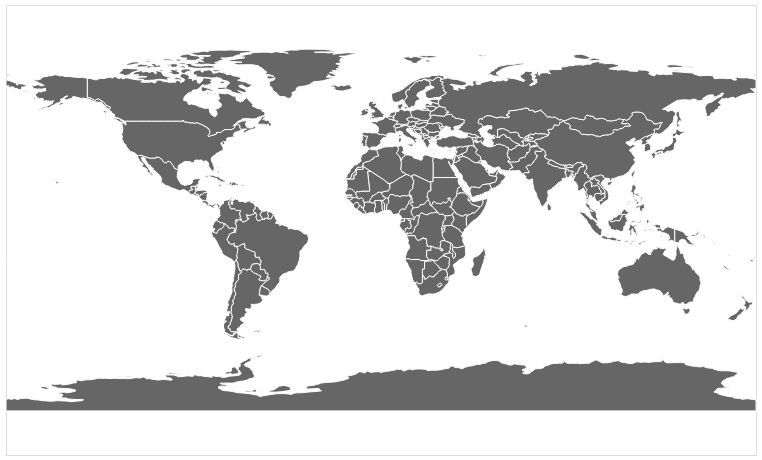

In [188]:
alt.Chart(countries).mark_geoshape(
    fill='#666666',
    stroke='white' 
).properties(
    width=750,
    height=450
).project('equirectangular')

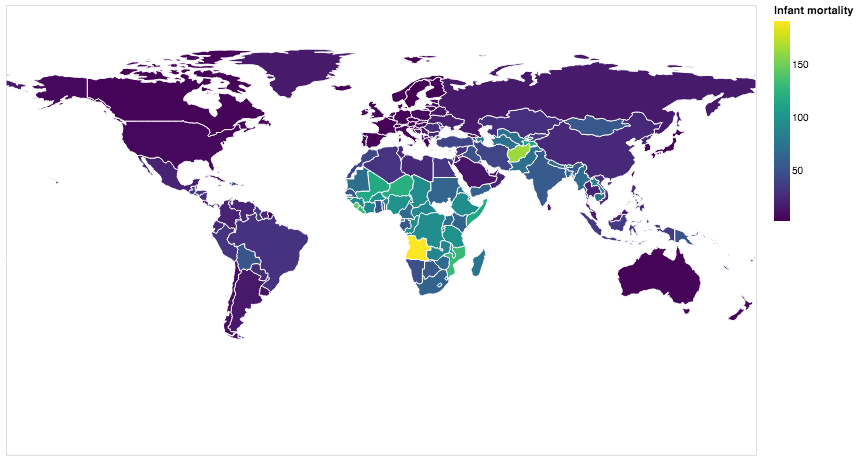

In [77]:
## DELETE from final version
countries = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(countries).mark_geoshape(
    fill='#666666',
    stroke='white'
).encode(color='Infant mortality:Q', 
         tooltip='Country:N'
).properties(
    width=750,
    height=450
).project('equirectangular').transform_lookup(
        lookup='id',
        from_=alt.LookupData(wd, 'CodeNum', ['Infant mortality', 'Country']))

base

## More Practice

### Screen Scraping Stock Prices

Create a graph of the closing price of Google Stock over the last year, using https://finance.yahoo.com/quote/GOOG/history?p=GOOG  as your source.

1. you will need to screen scrape the table of data and make a DataFrame from the results.

2. Next create a line graph using Altair

3. Can you figure out how to make a line graph that shows the opening price as well as the closing price for each day?  Hint:  If you data is an a tidy narrow format it will "just work" if you use the color channel to encode opening and closing

### Screen Scraping the CIA

Now its time to live dangerously!   The country data that we have been using was compiled and turned into a csv file in 2006.  Much of that data comes from the CIA World Factbook.  (not Facebook - as autocorrect so often thinks)

The goal of this exercise is to create an up to date version of our country data (at least 2017 as I write this) This will be challenging and fun as each column of the data is on its own page.  But you can do it, and you will see how powerful you are when you have the right tools!

However -- **Think Generally!** At the end of this we would like to be able to scrape the CIA data for **any** year not just 2017.  So keep that in mind.

You can download each year of the factbook going back to the year 2000 [from the CIA](https://www.cia.gov/library/publications/download/).  Start with the year 2017. The nice thing about this is that you can unzip the file on your local computer but still use `requests` without drawing attention to yourself on the CIA's website!

The Challenge of this project is that each variable is on its own page.  So we are going to have to combine many pages into a single coherent data frame.  Then when we have gathered all of the columns we can pull them together into one nice data frame and we'll learn how to save that to a CSV file.

Again, think generally.  If you design a good function for finding and scraping one piece of information make it work for all pieces of information and at the end you will have a little code that does a LOT of work.

Lets take a look at the file structure of the downloaded data from 2017



In [189]:
ls factbook/2017

appendix/          fonts/             index.html         rankorder/
css/               geos/              js/                scripts/
docs/              graphics/          print/             styles/
fields/            images/            print_Contact.pdf  wfbExt/


The folder that may jump out at you is called fields, so lets look at that in more detail.


In [196]:
import os
files = os.listdir('factbook/2017/fields')
print(sorted(files)[:10])

['2001.html', '2002.html', '2003.html', '2004.html', '2006.html', '2007.html', '2008.html', '2010.html', '2011.html', '2012.html']


### Getting a list of all fields

That may not look terribly useful but each of the numbered files contains one field that we can add to our data frame.  Examine one of them closely and see if you can figure out a good marker we can use to find the field contained in each.

In fact now that you are investigating and if you stop and think for a minute you may conclude that there must be some kind of nice human readable table of contents.  In fact there is take a look at the file `notesanddefs.html`

In the spirit of starting small and working our way up to a larger project write some code in the cell below to scrape all of the fields and the file they are in from the notesanddefs.html file.

### Loading all the data in rough form

One more thing to note.  You might assume that the country names will all be consistent from field to field but that probably isn't the case.  What is consistent is the two letter country code used in the URL to the detail information about each country.  So, what you are are going to have to do is build a data structure for each field.  you will want a name for the field, then a dictionary that maps from the two digit country code to the value of the field.

    all_data = {'field name' : {coutry_code : value} ...}

It may be that the data for the field and the country is more than we want, but it will be easiest for now to just get the data in rough form then we can clean it up once we have it in a dataframe

There are 177 different fields in the 2017 data.  Loading all of them would be a huge amount of work and more data than we need.  Lets start with a list that is close to our original data above

* Country -- name
* Code2
* Code3
* CodeNum
* Population
* Area
* Coastline
* Climate
* Net migration
* Birth rate
* Death rate
* Infant mortality rate
* Literacy
* GDP
* Government type
* Inflation rate
* Health expenditures
* GDP - composition, by sector of origin
* Land use
* Internet users


Feel free to add others if they interest you.

If you use the structure given above you can just pass that to the DataFrame constructor and you should have something that looks like this:

In [94]:
#pd.DataFrame(data).head()

,Area,Birth rate,Climate,Coastline,Death rate,GDP (purchasing power parity),"GDP - composition, by sector of origin",Government type,Health expenditures,Infant mortality rate,Internet users,Land use,Literacy,Population,Country
aa,total: 180 sq km\nland: 180 sq km\nwater: 0 sq km,"12.4 births/1,000 population (2017 est.)",tropical marine; little seasonal temperature v...,68.5 km,"8.4 deaths/1,000 population (2017 est.)",$2.516 billion (2009 est.)\n$2.258 billion (20...,agriculture: 0.4%\nindustry: 33.3%\nservices: ...,parliamentary democracy (Legislature); part of...,NaN,"total: 10.7 deaths/1,000 live births\nmale: 14...","total: 106,309\npercent of population: 93.5% (...",agricultural land: 11.1%\narable land 11.1%; p...,definition: age 15 and over can read and write...,"115,120 (July 2017 est.)",Aruba
ac,total: 442.6 sq km (Antigua 280 sq km; Barbuda...,"15.7 births/1,000 population (2017 est.)",tropical maritime; little seasonal temperature...,153 km,"5.7 deaths/1,000 population (2017 est.)",$2.288 billion (2016 est.)\n$2.145 billion (20...,agriculture: 2.3%\nindustry: 20.2%\nservices: ...,parliamentary democracy (Parliament) under a c...,5.5% of GDP (2014),"total: 12.1 deaths/1,000 live births\nmale: 13...","total: 60,000\npercent of population: 65.2% (J...",agricultural land: 20.5%\narable land 9.1%; pe...,definition: age 15 and over has completed five...,"94,731 (July 2017 est.)",Antigua and Barbuda
ae,"total: 83,600 sq km\nland: 83,600 sq km\nwater...","15.1 births/1,000 population (2017 est.)",desert; cooler in eastern mountains,"1,318 km","1.9 deaths/1,000 population (2017 est.)",$671.1 billion (2016 est.)\n$643.1 billion (20...,agriculture: 0.8%\nindustry: 39.5%\nservices: ...,federation of monarchies,3.6% of GDP (2014),"total: 10 deaths/1,000 live births\nmale: 11.6...","total: 5,370,299\npercent of population: 90.6%...",agricultural land: 4.6%\narable land 0.5%; per...,definition: age 15 and over can read and write...,"6,072,475 (July 2017 est.)\nnote: the UN estim...",United Arab Emirates
af,"total: 652,230 sq km\nland: 652,230 sq km\nwat...","37.9 births/1,000 population (2017 est.)",arid to semiarid; cold winters and hot summers,0 km (landlocked),"13.4 deaths/1,000 population (2017 est.)",$66.65 billion (2016 est.)\n$64.29 billion (20...,agriculture: 22%\nindustry: 22%\nservices: 56%...,presidential Islamic republic,8.2% of GDP (2014),"total: 110.6 deaths/1,000 live births\nmale: 1...","total: 3,531,770\npercent of population: 10.6%...",agricultural land: 58.07%\narable land 20.5%; ...,definition: age 15 and over can read and write...,"34,124,811 (July 2017 est.)",Afghanistan
ag,"total: 2,381,741 sq km\nland: 2,381,741 sq km\...","22.2 births/1,000 population (2017 est.)","arid to semiarid; mild, wet winters with hot, ...",998 km,"4.3 deaths/1,000 population (2017 est.)",$609.6 billion (2016 est.)\n$582.7 billion (20...,agriculture: 12.9%\nindustry: 36.2%\nservices:...,presidential republic,7.2% of GDP (2014),"total: 19.6 deaths/1,000 live births\nmale: 21...","total: 17,291,463\npercent of population: 42.9...",agricultural land: 17.4%\narable land 18.02%; ...,definition: age 15 and over can read and write...,"40,969,443 (July 2017 est.)",Algeria


So, we have made lot of progress but we have a lot of cleanup to do!

### Cleaning the data


With the data now in a dataframe we can begin the hard work of cleaning. it up and adding our last few columns -- the 3 letter and numeric country codes!  But those are easy to get from the two digit country code using the same website we used before!

We can do this nicely and tackle one column at a time.  This is a lot of string processing and type conversion work.  A lot of this can be made easier by using regular expression pattern matching.  Which is a very big skill to add to your arsenal.  If you haven't used them before or are out of practice [Go through this tutorial](http://evc-cit.info/comsc020/python-regex-tutorial/)


**Instructors Note:** This would work well as a class project where each team gets a column to transform and then everyone can share their solution with everyone else.  Or if you don't have enough students then each team can take one or more columns.



### Saving the data

We can save the data using `to_csv`

### Rinse Repeat

If you try to repeat the exercise above for 2016 it works great!  What about 2015? Earlier?  How far back can you go before your code breaks? 

What you will find when you go back illustrates one of the real ugly parts of screen scraping.  Which is that you are at the mercy of the web site designer.  All they have to do is make one little change to a CSS class or the id of an element and boom your whole strategy goes away

### Comparing across the years.

If you or you and your classmates can scrape all 17 years of world factbook data you will really have achieved something.  And are destined for internet fame if you make your notebooks public.   You will likely have noticed that lots of people want this data in a more convenient format.